# Telecom Churn Prediction Model

## Project Life Cycle
1. Understand Problem Statement
2. Data Collection
3. Data Checks and validation
4. Exploratory Data Analysis (EDA)
5. Data Pre-processing
6. Model Training & Testing
7. Model Evaluation - Choosing the best model

## 1. Understand the Problem Statement: 
-> *What is churn?* Churn occurs when a customer stops using the company's services and leaves for another provider.
This is bad for the company because acquiring new customers is often more expensive than keeping existing ones.


*Goal*:
This project involves identifying patterns and factors contributing to customer churn and building a predictive model
to help the telecom company retain customers.
Understand the relationships between factors and churn to better;

i.  Predict if a customer is likely to churn.


ii. Identify what factors contribute to churn so the company can take action to reduce it.

## 2. Data Collection:
-> *Data Source* : [Source](https://www.kaggle.com/royjafari/customer-churn) for data  and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description.


-> The data consist of 14 columns and 3150 rows [see data_dict.md file]

### 2.1. Install Packages and Import Necessary Libraries



In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
import math

### 2.2. Import Data

In [42]:
df = pd.read_csv('data/customer_churn.csv')

take a look into the data

In [43]:

df.shape

(3150, 14)

In [44]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


## 3. Data Validation - Quality checks:

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Features Engineering


### 3.1. Check for Missing values

In [45]:
df.isna().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

No null records present in the data set.

### 3.2  Duplicates:


In [46]:
df.duplicated().sum()

300

There are about 300 duplicate records(row records)

In [47]:
# drop duplicates

df.drop_duplicates(inplace=True)  # Modifies the original DataFrame directly


In [48]:
df.shape

(2850, 14)

### 3.3. Check Data Types

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             2850 non-null   int64  
 1   Complaints               2850 non-null   int64  
 2   Subscription Length      2850 non-null   int64  
 3   Charge Amount            2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

The df carries the right Dtypes for each column.

### 3.4. Check count of  Unique Values

In [50]:
df.nunique()

Call Failure                 37
Complaints                    2
Subscription Length          45
Charge Amount                11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

### 3.5. Data Stats 

In [51]:
df.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,0.080702,32.452982,0.974737,4534.243158,70.484912,73.789825,23.870526,2.835088,1.080351,1.240000,31.077193,474.990367,0.156491
std,7.326172,0.272424,8.723075,1.550618,4199.712303,57.401512,112.062397,17.193929,0.893503,0.271883,0.427158,8.861934,514.442198,0.363384
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1458.750000,28.000000,7.000000,11.000000,2.000000,1.000000,1.000000,25.000000,117.527500,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3041.000000,54.500000,22.000000,21.000000,3.000000,1.000000,1.000000,30.000000,232.520000,0.000000
75%,12.000000,0.000000,38.000000,2.000000,6500.000000,96.000000,88.000000,34.000000,3.000000,1.000000,1.000000,30.000000,790.080000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


#### Insights 
1. Low Churn: Only approximately 16% of customers leave, and most stay for a long time (average: 32 months). This shows good customer loyalty.

2. Big Differences in Usage: Some customers use the service a lot (up to 17,090 calls), while others barely use it. SMS use also varies widely.

3. Customer Value Concentration: A few customers have a higher Customer Value (highest value: 2165), while half contribute less than 233.

4. Few Complaints, Many Call Failures: Complaints are rare (only 8%), but call failures are common (average: 7.8). These failures might affect satisfaction.

5. Missed Revenue: Many customers are in the lowest ordinal charge group charged (median charges: 0)

without knowing the statistical relationships or the context behind the attributes, we can only make general observations, not firm conclusions.

### 3.6. Features Engineering 

Creating new features or transforming existing ones can improve the prediction of the target attribute.

Honestly, the data already has most metrics that measure customer behaviors, and service usage patterns, so there isn't much to do.

1. Churn Rate by Customer Segment: Group by specific segmented features such as age group, and tariff plan and calculate the churn rate for each segment.

In [52]:
# Group by age group and calculate churn rate for each group, make that an attribute

# create a copy of df
feature = df.copy()

# create churn rate by age group attribute
feature['Age Group Churn Rate'] = feature.groupby('Age Group')['Churn'].transform('mean').round(2)

# create churn rate by charge amount attribute

feature['Charge Amount Churn Rate'] = feature.groupby('Charge Amount')['Churn'].transform('mean').round(2)

# create churn rate by tariff plan attribute

feature['Tariff Plan Churn Rate'] = feature.groupby('Tariff Plan')['Churn'].transform('mean').round(2)

# create call efficiency metric
#feature['Call Efficiency'] = (feature['Seconds of Use'] / feature['Frequency of use']).round(3)

feature.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Age Group Churn Rate,Charge Amount Churn Rate,Tariff Plan Churn Rate
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,0.16,0.24,0.17
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,0.17,0.24,0.17
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,0.16,0.24,0.17
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,0.00,0.24,0.17
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,0.00,0.24,0.17


In [53]:
# Display the unique age groups with their corresponding churn rates and sort by churn rate
churn_rate_table = feature[['Age Group', 'Age Group Churn Rate']].drop_duplicates().reset_index(drop=True)
churn_rate_table = churn_rate_table.sort_values(by='Age Group Churn Rate', ascending=False)
print(churn_rate_table)


   Age Group  Age Group Churn Rate
3          4                  0.20
1          2                  0.17
0          3                  0.16
4          5                  0.01
2          1                  0.00


In [54]:
churn_rate_table2 = feature[['Tariff Plan', 'Tariff Plan Churn Rate']].drop_duplicates().reset_index(drop=True)
churn_rate_table2 = churn_rate_table2.sort_values(by='Tariff Plan Churn Rate', ascending=False)
print(churn_rate_table2)

   Tariff Plan  Tariff Plan Churn Rate
0            1                    0.17
1            2                    0.03


In [55]:
churn_rate_table3 = feature[['Charge Amount', 'Charge Amount Churn Rate']].drop_duplicates().reset_index(drop=True)
churn_rate_table3 = churn_rate_table3.sort_values(by='Charge Amount Churn Rate', ascending=False)
print(churn_rate_table3)

    Charge Amount  Charge Amount Churn Rate
0               0                      0.24
1               1                      0.08
2               2                      0.06
3               3                      0.04
5               4                      0.01
4               8                      0.00
6               9                      0.00
7               7                      0.00
8               5                      0.00
9              10                      0.00
10              6                      0.00


#### Insights

1. Age Group 4 has the highest churn rate, indicating a potential area for customer retention focus.

2. Tariff Plan 1 shows a significantly higher churn rate compared to Tariff Plan 2 (contractual), suggesting dissatisfaction with Plan 1(Pay as you go).

3. Charge Amounts correlate with churn rates, where higher charges rank (e.g., 4, 6, 7, 8, 9, 10) are linked to lower churn, while lower charges rank (0, 1, 2) have higher churn rates.

## 4. Exploratory Data Analysis ( With Visualizations)

(EDA) is all about analyzing and visualizing data to uncover patterns, spot anomalies, test hypotheses, and summarize key statistics.

Target attribute is Churn. We will be exploring all dependent attributes against churn. to understand their relationships, and all that was stated above.


In [56]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call Failure              2850 non-null   int64  
 1   Complaints                2850 non-null   int64  
 2   Subscription Length       2850 non-null   int64  
 3   Charge Amount             2850 non-null   int64  
 4   Seconds of Use            2850 non-null   int64  
 5   Frequency of use          2850 non-null   int64  
 6   Frequency of SMS          2850 non-null   int64  
 7   Distinct Called Numbers   2850 non-null   int64  
 8   Age Group                 2850 non-null   int64  
 9   Tariff Plan               2850 non-null   int64  
 10  Status                    2850 non-null   int64  
 11  Age                       2850 non-null   int64  
 12  Customer Value            2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Age Group Chu

### 4.1 Distribution Plots : Understanding skewness and the need for normalization or interactive terms.

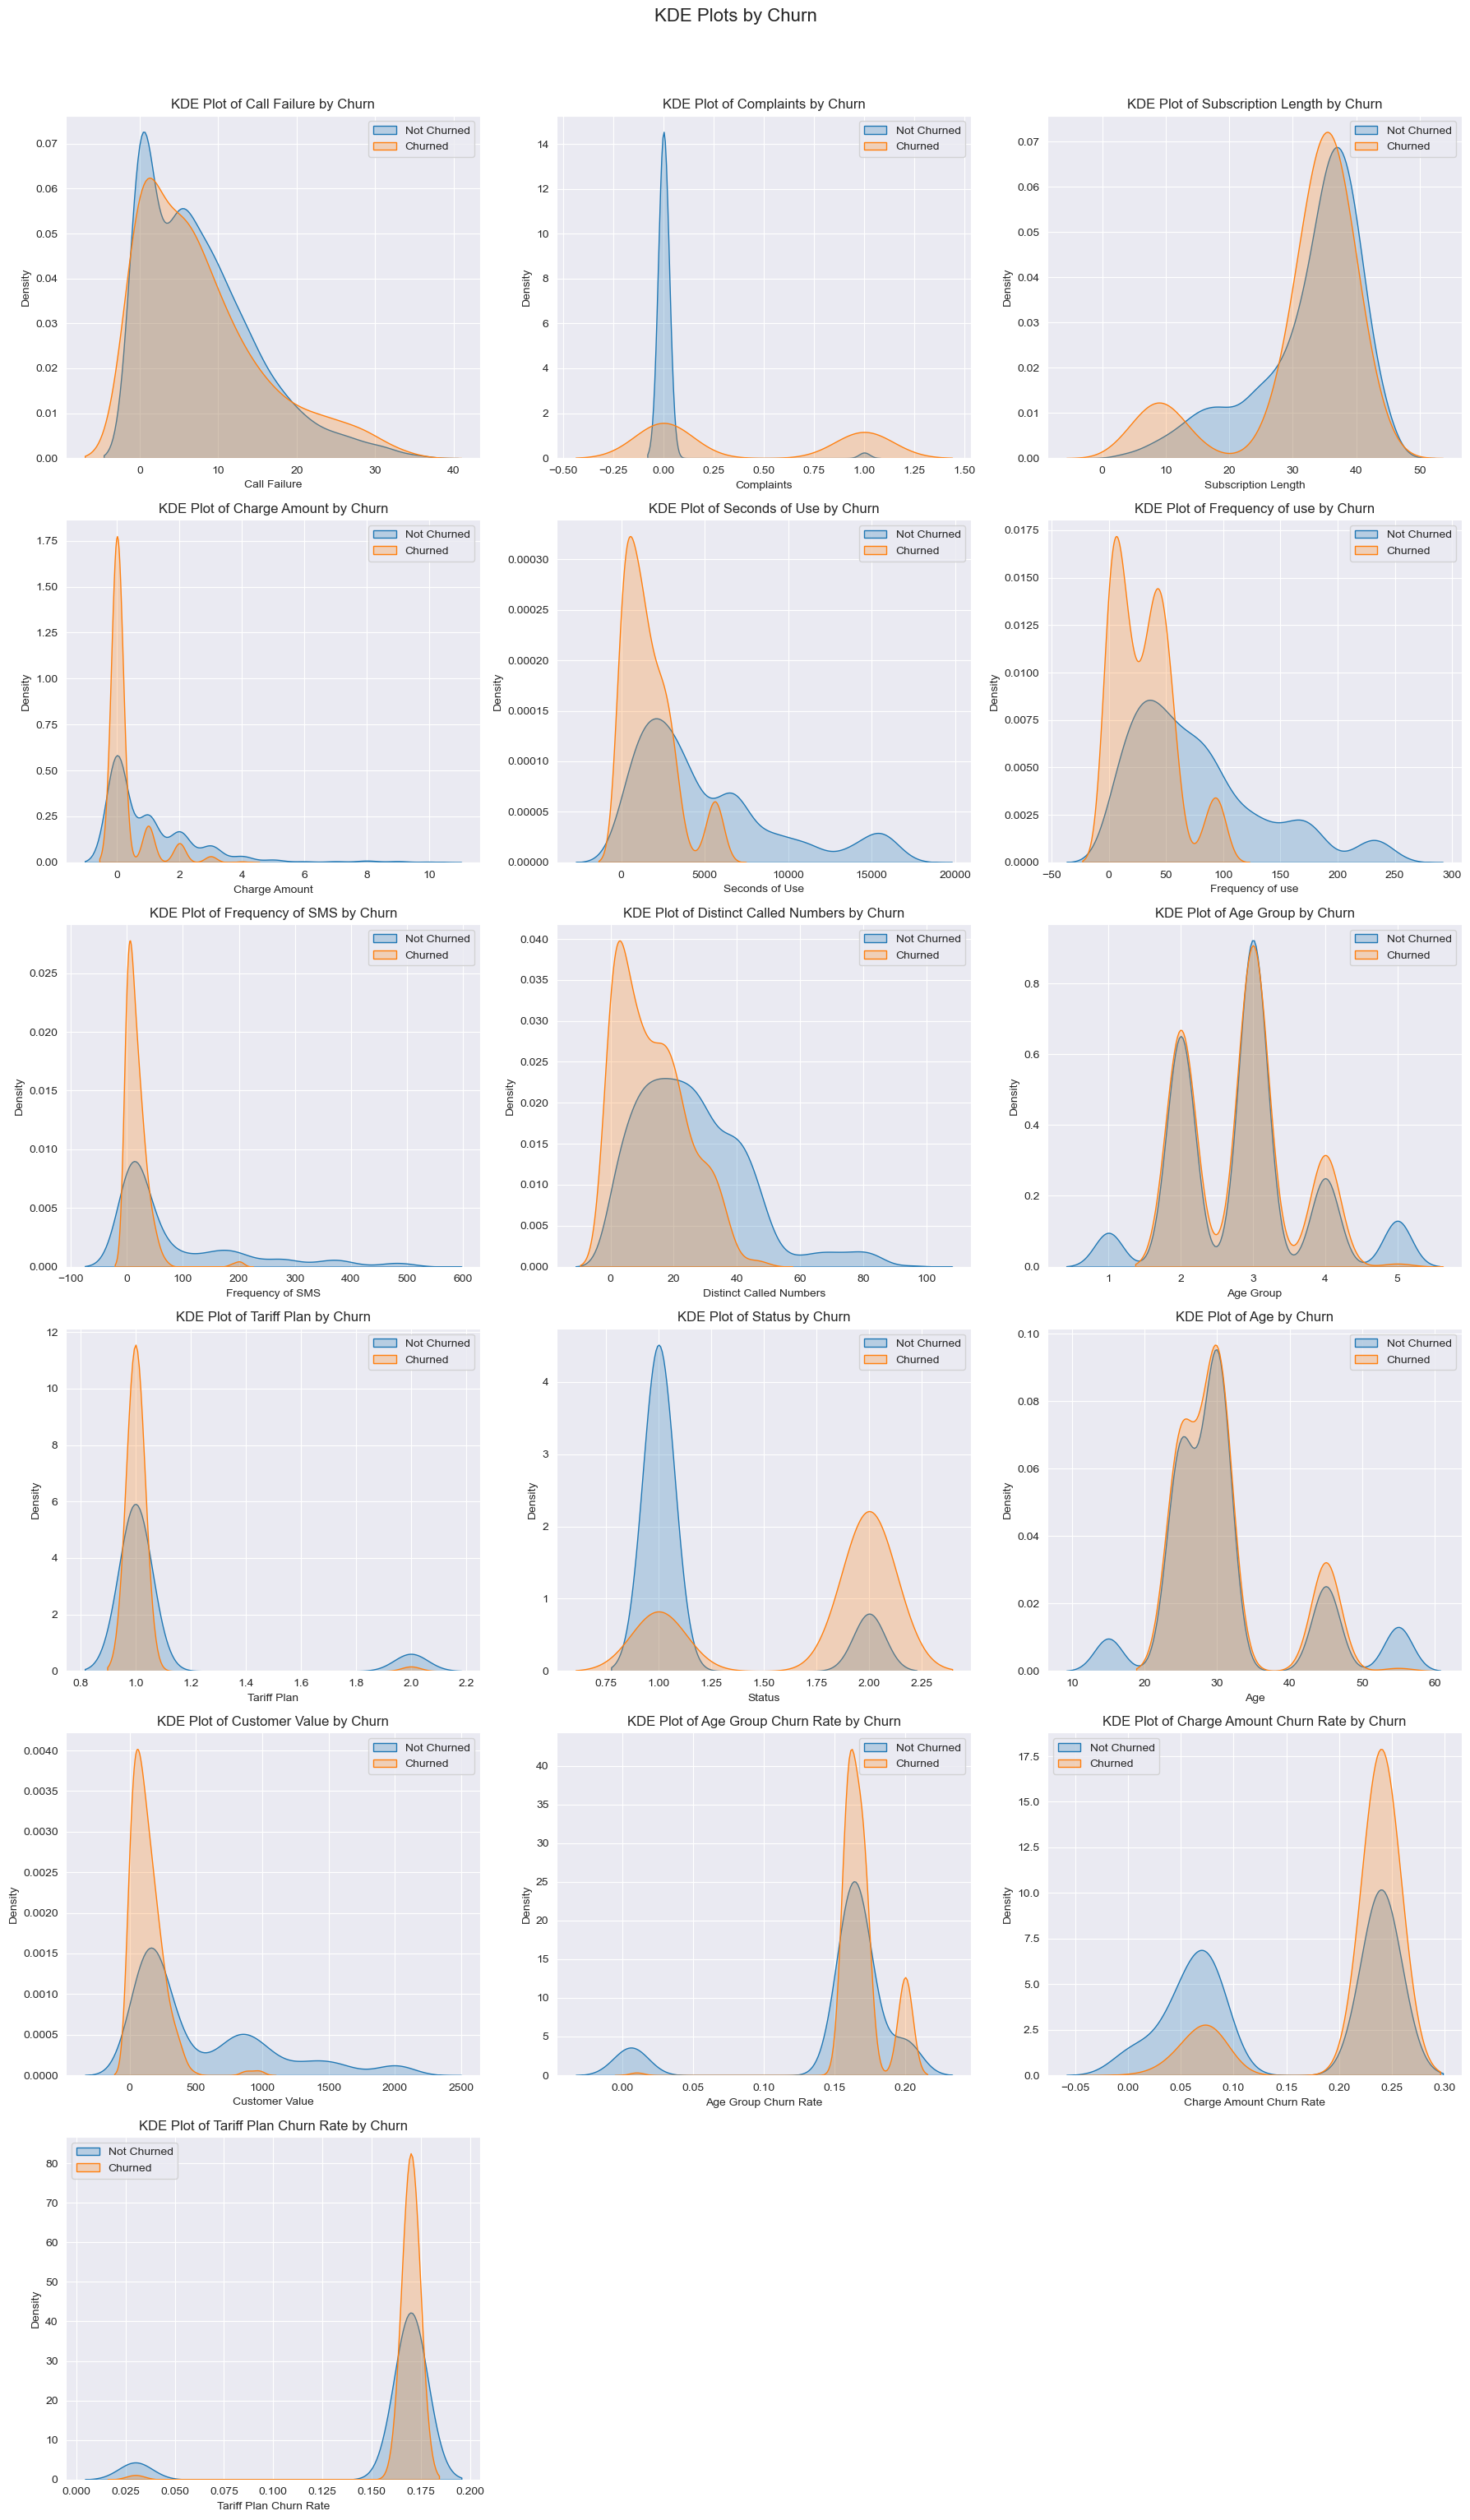

In [57]:
# List of numerical attributes (excluding 'Churn')
numerical_vars = feature.columns.drop('Churn')

# Set up the subplot grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a visuals and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
fig.suptitle('KDE Plots by Churn', y=1.02, fontsize=16)  # Add a title to the figure

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each attribute and plot KDE in subplots
for i, var in enumerate(numerical_vars):
    sns.kdeplot(data=feature[feature['Churn'] == 0], x=var, label='Not Churned', fill=True, ax=axes[i])
    sns.kdeplot(data=feature[feature['Churn'] == 1], x=var, label='Churned', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {var} by Churn')
    axes[i].legend()

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [58]:
skewness = feature[numerical_vars].skew()
print(skewness)

Call Failure                1.067233
Complaints                  3.080435
Subscription Length        -1.252843
Charge Amount               2.533804
Seconds of Use              1.314737
Frequency of use            1.145862
Frequency of SMS            1.971020
Distinct Called Numbers     1.039277
Age Group                   0.453043
Tariff Plan                 3.089147
Status                      1.218203
Age                         1.223952
Customer Value              1.422214
Age Group Churn Rate       -2.438232
Charge Amount Churn Rate   -0.321546
Tariff Plan Churn Rate     -3.089147
dtype: float64


#### Insight

From kde plot and the .skew() method which quantifies the skewness of each attribute clearly shows only Age Group is normally distributed and approximately symmetrically distributed. So Transformation is needed.

What Each Value Means:

1. Charge Amount (2.534): Strongly right-skewed, meaning most customers are charged lower amounts, but a few have very high charges.

2. Seconds of Use (1.315): Moderately right-skewed, indicating most customers have lower usage durations, with some customers having significantly higher usage.

3. Frequency of Use (1.146): Slightly right-skewed, showing most customers use the service less frequently, but a few use it very often.

4. Frequency of SMS (1.971): Strongly right-skewed, meaning most customers send fewer SMS, but a few send a very high number.

5. Distinct Called Numbers (1.039): Slightly right-skewed, indicating most customers call fewer unique numbers, with some calling many.

6. Age Group (0.453): Approximately symmetric, meaning age group distribution is fairly balanced.

7. Tariff Plan (3.089): Strongly right-skewed, suggesting most customers are on lower-cost plans, but a few are on higher-cost ones.

8. Status (1.218): Moderately right-skewed, indicating most customers are in a lower "status" category, but some have higher statuses.

9. Age (1.224): Moderately right-skewed, meaning most customers are younger, with a few older ones.

10. Customer Value (1.422): Moderately right-skewed, indicating most customers provide lower value, but a few have very high value.

11. Age Group Churn Rate (-2.438): Strongly left-skewed, suggesting most churn occurs in higher age groups, with minimal churn in younger groups.

12. Charge Amount Churn Rate (-0.322): Approximately symmetric, meaning churn rates are evenly distributed across charge amounts.

13. Tariff Plan Churn Rate (-3.089): Strongly left-skewed, indicating churn is concentrated among customers with Pay as you go tariff plans, with contractual plans seeing minimal churn.



#### Next Step : Transformation is needed to Normalize this skewed attributes


##### Table for Suggested Transformations Based on Skewness:

##### | **attribute**                    | **Skewness**   | **Transformation**                                | **Rationale**                                                |
##### |----------------------------------|----------------|---------------------------------------------------|--------------------------------------------------------------|
##### | **Charge Amount**                | 2.534 (Right)  | Log or Square Root                                 | Reduces the effect of extreme values, normalizes the data.     |
##### | **Seconds of Use**               | 1.315 (Right)  | Log or Square Root                                 | Reduces the effect of extreme values, normalizes the data.     |
##### | **Frequency of Use**             | 1.146 (Right)  | Log or Square Root                                 | Helps to reduce the skewness and bring data closer to normal.  |
##### | **Frequency of SMS**             | 1.971 (Right)  | Log or Square Root                                 | Reduces the impact of extreme values, normalizes the data.     |
##### | **Distinct Called Numbers**      | 1.039 (Right)  | Log or Square Root                                 | Normalizes the data to reduce skewness.                       |
##### | **Age Group**                    | 0.453 (Symmetric) | No transformation needed                        | Distribution is fairly balanced.                              |
##### | **Tariff Plan**                  | 3.089 (Right)  | Log or Square Root                                 | Reduces the right skew and normalizes the data.               |
##### | **Status**                       | 1.218 (Right)  | Log or Square Root                                 | Reduces the effect of skewness.                               |
##### | **Age**                          | 1.224 (Right)  | Log or Square Root                                 | Helps normalize the distribution and reduce skewness.          |
##### | **Customer Value**               | 1.422 (Right)  | Log or Square Root                                 | Reduces skewness and helps with data normalization.            |
##### | **Age Group Churn Rate**         | -2.438 (Left)  | Reflect (e.g., Log of negative inverse)            | To handle the negative skew (left-skew), a reflection is applied. |
##### | **Charge Amount Churn Rate**     | -0.322 (Symmetric) | No transformation needed                        | Distribution is nearly symmetric.                             |
##### | **Tariff Plan Churn Rate**       | -3.089 (Left)  | Reflect (e.g., Log of negative inverse)            | To handle the left skew, use reflection to transform the data. |





In [59]:
# its important to note if the attribute contains negative value to choose the best reflect approach( for left skewed attributes) 
# transformations like log, boxcox or square root, require non-negative or strictly positive values.
n = feature['Subscription Length'].unique()
n

array([38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 18, 17, 15, 16,  9, 40,
       41, 29, 28, 20, 19, 11, 32, 24, 23, 13, 14,  7, 42, 43, 30, 22, 21,
       12,  5, 44, 45, 10,  3,  6,  8,  4, 46, 47], dtype=int64)

In [60]:
count = (feature['Age Group Churn Rate'] < -0).sum()
print(count)

0


In [61]:
# Define the transformations
feature['Call_Failure_log'] = np.log1p(feature['Call Failure'])  # Slight positive skew
feature['Complaints_log'] = np.log1p(feature['Complaints'])  # Strong positive skew
feature['Subscription_Length_reflect'] = np.max(feature['Subscription Length']) - feature['Subscription Length']  # Reflect
feature['Subscription_Length_log'] = np.log1p(feature['Subscription_Length_reflect'])  # Reflect + log for negative skew
feature['Charge_Amount_log'] = np.log1p(feature['Charge Amount'])  # Strong positive skew
feature['Seconds_of_Use_log'] = np.log1p(feature['Seconds of Use'])  # Positive skew
feature['Frequency_of_Use_sqrt'] = np.sqrt(feature['Frequency of use'])  # Moderate positive skew
feature['Frequency_of_SMS_log'] = np.log1p(feature['Frequency of SMS'])  # Strong positive skew
feature['Distinct_Called_Numbers_log'] = np.log1p(feature['Distinct Called Numbers'])  # Slight positive skew
feature['Tariff_Plan_log'] = np.log1p(feature['Tariff Plan'])  # Strong positive skew
feature['Status_log'] = np.log1p(feature['Status'])  # Positive skew
feature['Age_sqrt'] = np.sqrt(feature['Age'])  # Moderate positive skew
feature['Customer_Value_log'] = np.log1p(feature['Customer Value'])  # Positive skew

# For Age Group Churn Rate (strong negative skew)
feature['Age_Group_Churn_reflect'] = np.max(feature['Age Group Churn Rate']) - feature['Age Group Churn Rate']  # Reflect
feature['Age_Group_Churn_log'] = np.log1p(feature['Age_Group_Churn_reflect'])  # Reflect + log

# For Tariff Plan Churn Rate (strong negative skew)
feature['Tariff_Plan_Churn_reflect'] = np.max(feature['Tariff Plan Churn Rate']) - feature['Tariff Plan Churn Rate']  # Reflect
feature['Tariff_Plan_Churn_log'] = np.log1p(feature['Tariff_Plan_Churn_reflect'])  # Reflect + log

# No transformation needed for Age Group and Charge Amount Churn Rate

In [62]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Call Failure                 2850 non-null   int64  
 1   Complaints                   2850 non-null   int64  
 2   Subscription Length          2850 non-null   int64  
 3   Charge Amount                2850 non-null   int64  
 4   Seconds of Use               2850 non-null   int64  
 5   Frequency of use             2850 non-null   int64  
 6   Frequency of SMS             2850 non-null   int64  
 7   Distinct Called Numbers      2850 non-null   int64  
 8   Age Group                    2850 non-null   int64  
 9   Tariff Plan                  2850 non-null   int64  
 10  Status                       2850 non-null   int64  
 11  Age                          2850 non-null   int64  
 12  Customer Value               2850 non-null   float64
 13  Churn                  

##### Check again the skewness of this Transformed attributes 

In [63]:
transformed_vars = [
    'Call_Failure_log', 'Complaints_log', 'Subscription_Length_log',
    'Charge_Amount_log', 'Seconds_of_Use_log', 'Frequency_of_Use_sqrt',
    'Frequency_of_SMS_log', 'Distinct_Called_Numbers_log', 'Tariff_Plan_log',
    'Status_log', 'Age_sqrt', 'Customer_Value_log', 'Age_Group_Churn_log',
    'Tariff_Plan_Churn_log'
]
print(feature[transformed_vars].skew())

Call_Failure_log              -0.475646
Complaints_log                 3.080435
Subscription_Length_log       -0.165482
Charge_Amount_log              0.927245
Seconds_of_Use_log            -2.792067
Frequency_of_Use_sqrt          0.101230
Frequency_of_SMS_log          -0.220583
Distinct_Called_Numbers_log   -1.214177
Tariff_Plan_log                3.089147
Status_log                     1.218203
Age_sqrt                       0.829932
Customer_Value_log            -1.343970
Age_Group_Churn_log            2.374122
Tariff_Plan_Churn_log          3.089147
dtype: float64


*General Insights*:

Many of the attributes are now closer to symmetrical, making them more suitable for modeling.
However, Complaints_log, Seconds_of_Use_log, Tariff_Plan_log, Age_Group_Churn_log, and Tariff_Plan_Churn_log remain significantly skewed.id need additional transformations like Box-Cox transformation (for strictly positive values).

 *Observations:*
 
 The skewness values for these certain attributes (e.g., Age Group Churn Rate, Tariff Plan, etc.) 
 remained the same after applying the log transformation. 
 To address this, we are switching to the Box-Cox transformation for these attributes 
 as it is more effective for reducing skewness in cases where log transformation fails.

#### proceeds to transform using Box-Cox

In [64]:
# List of attributes to update
vars_to_transform = [
    "Complaints",
    "Seconds of Use",
    "Status",
    "Distinct Called Numbers",
    "Customer Value",
    "Tariff Plan",
    "Age_Group_Churn_reflect",  #using the reflect because the original attribute is left skewed. and reflect was performed on it.   
    "Tariff_Plan_Churn_reflect",
]



In [65]:
# Check for negative values
for var in vars_to_transform:
    negative_count = (feature[var] < 0).sum()
    if negative_count > 0:
        print(f"{var} contains {negative_count} negative values.")
    else:
        print(f"{var} has no negative values.")

Complaints has no negative values.
Seconds of Use has no negative values.
Status has no negative values.
Distinct Called Numbers has no negative values.
Customer Value has no negative values.
Tariff Plan has no negative values.
Age_Group_Churn_reflect has no negative values.
Tariff_Plan_Churn_reflect has no negative values.


In [66]:
# Transform each attribute
for var in vars_to_transform:
    boxcox_var = f"{var}_boxcox"

    # Apply Box-Cox Transformation
    feature[boxcox_var], _ = boxcox(feature[var] +1)  # Small constant to avoid 0
    print(f"Transformed {var} to {boxcox_var} using Box-Cox.")


Transformed Complaints to Complaints_boxcox using Box-Cox.
Transformed Seconds of Use to Seconds of Use_boxcox using Box-Cox.
Transformed Status to Status_boxcox using Box-Cox.
Transformed Distinct Called Numbers to Distinct Called Numbers_boxcox using Box-Cox.
Transformed Customer Value to Customer Value_boxcox using Box-Cox.
Transformed Tariff Plan to Tariff Plan_boxcox using Box-Cox.
Transformed Age_Group_Churn_reflect to Age_Group_Churn_reflect_boxcox using Box-Cox.
Transformed Tariff_Plan_Churn_reflect to Tariff_Plan_Churn_reflect_boxcox using Box-Cox.


In [67]:
# Recalculate skewness for transformed attributes
boxcox_vars = [f"{var}_boxcox" for var in vars_to_transform]
skewness_after = feature[boxcox_vars].skew()
print("Skewness after Box-Cox transformation:")
print(skewness_after)

Skewness after Box-Cox transformation:
Complaints_boxcox                   3.080435
Seconds of Use_boxcox              -0.090346
Status_boxcox                       1.218203
Distinct Called Numbers_boxcox     -0.068665
Customer Value_boxcox              -0.030441
Tariff Plan_boxcox                  0.000000
Age_Group_Churn_reflect_boxcox     -0.011474
Tariff_Plan_Churn_reflect_boxcox    3.089147
dtype: float64


#### Replace transformed attributes as the original attributes 

In [68]:
feature.columns

Index(['Call Failure', 'Complaints', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn', 'Age Group Churn Rate',
       'Charge Amount Churn Rate', 'Tariff Plan Churn Rate',
       'Call_Failure_log', 'Complaints_log', 'Subscription_Length_reflect',
       'Subscription_Length_log', 'Charge_Amount_log', 'Seconds_of_Use_log',
       'Frequency_of_Use_sqrt', 'Frequency_of_SMS_log',
       'Distinct_Called_Numbers_log', 'Tariff_Plan_log', 'Status_log',
       'Age_sqrt', 'Customer_Value_log', 'Age_Group_Churn_reflect',
       'Age_Group_Churn_log', 'Tariff_Plan_Churn_reflect',
       'Tariff_Plan_Churn_log', 'Complaints_boxcox', 'Seconds of Use_boxcox',
       'Status_boxcox', 'Distinct Called Numbers_boxcox',
       'Customer Value_boxcox', 'Tariff Plan_boxcox',
       'Age_Group_Churn_reflect_boxcox', 'Tariff_Plan_Churn_ref

In [69]:
# Create a new DataFrame `tdf`- {transformed data frame} with the specified columns from `feature` and rename them
tdf = pd.DataFrame({
    'Call Failure': feature['Call_Failure_log'],
    'Complaints': feature['Complaints_boxcox'],
    'Subscription Length': feature['Subscription_Length_log'],
    'Charge Amount': feature['Charge_Amount_log'],
    'Seconds of Use': feature['Seconds of Use_boxcox'],
    'Frequency of use': feature['Frequency_of_Use_sqrt'],
    'Frequency of SMS': feature['Frequency_of_SMS_log'],
    'Distinct Called Numbers': feature['Distinct Called Numbers_boxcox'],
    'Age Group': feature['Age Group'],
    'Tariff Plan': feature['Tariff Plan_boxcox'],
    'Status': feature['Status_boxcox'],
    'Age': feature['Age_sqrt'],
    'Customer Value': feature['Customer Value_boxcox'],
    'Churn': feature['Churn'],
    'Age Group Churn Rate': feature['Age_Group_Churn_reflect_boxcox'],
    'Charge Amount Churn Rate': feature['Charge Amount Churn Rate'],
    'Tariff Plan Churn Rate': feature['Tariff_Plan_Churn_reflect_boxcox']
})



In [70]:
# confirm the skewness 
skewness = tdf.skew()
print("Skewness of columns in tdf:")
print(skewness)

Skewness of columns in tdf:
Call Failure               -0.475646
Complaints                  3.080435
Subscription Length        -0.165482
Charge Amount               0.927245
Seconds of Use             -0.090346
Frequency of use            0.101230
Frequency of SMS           -0.220583
Distinct Called Numbers    -0.068665
Age Group                   0.453043
Tariff Plan                 0.000000
Status                      1.218203
Age                         0.829932
Customer Value             -0.030441
Churn                       1.891937
Age Group Churn Rate       -0.011474
Charge Amount Churn Rate   -0.321546
Tariff Plan Churn Rate      3.089147
dtype: float64


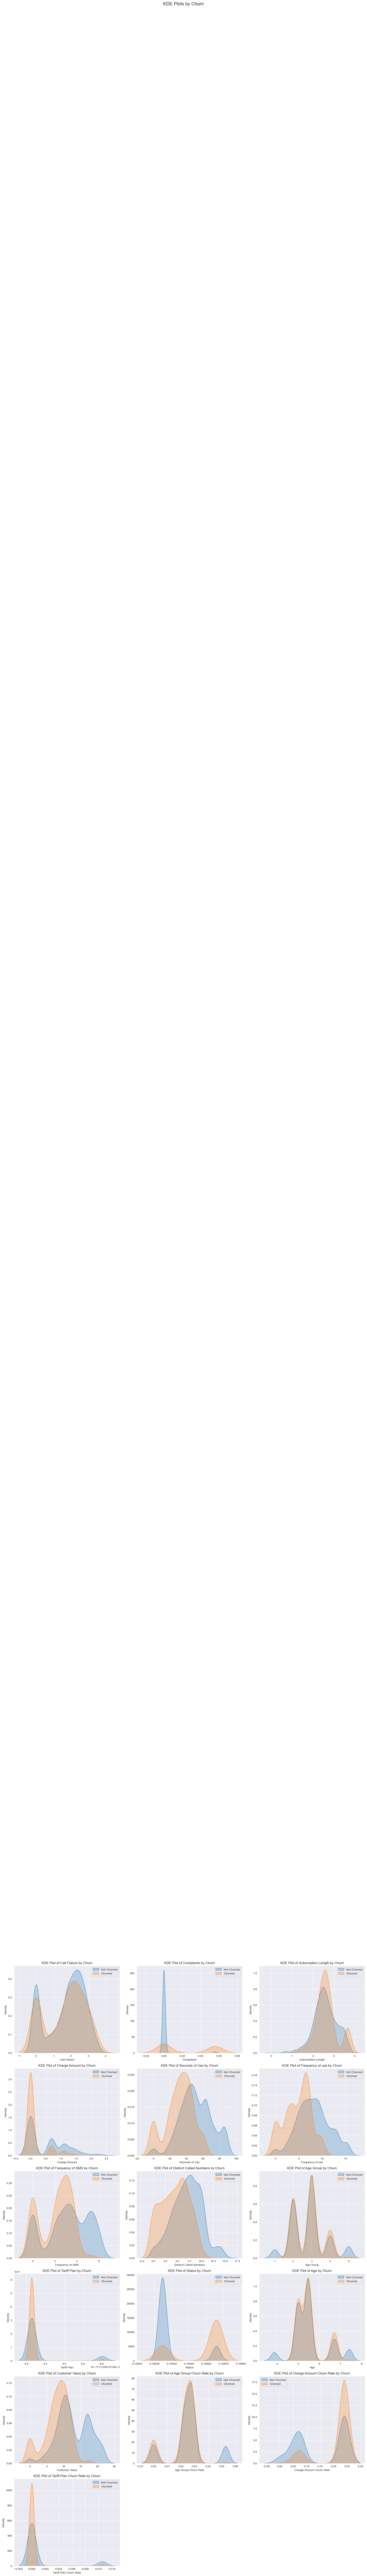

In [71]:
attributes_to_check = tdf.drop(columns=['Churn'])

# Set up the subplot grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(attributes_to_check) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create visuals and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))
fig.suptitle('KDE Plots by Churn', y=1.02, fontsize=16)  # Add a title to the figure

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each attribute and plot KDE in subplots
for i, var in enumerate(attributes_to_check):
    sns.kdeplot(data=tdf[tdf['Churn'] == 0], x=var, label='Not Churned', fill=True, ax=axes[i])
    sns.kdeplot(data=tdf[tdf['Churn'] == 1], x=var, label='Churned', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {var} by Churn')
    axes[i].legend()

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Insight:

There are 3 attributes highly skewed. Further investigation is to be carried out; Detecting outliers, this could be a huge reason why the attributes are still skewed despite having been transformed.

### 4.2. Outliers Detection

 Outliers can pull the distribution in one direction, causing skewness.

 Many machine learning algorithms are sensitive to outliers, which can lead to poor performance.

 Outliers may indicate data entry errors, measurement errors, or rare but valid events

In [72]:
# Detect outliers using IQR
for attribute in attributes_to_check:
    Q1 = tdf[attribute].quantile(0.25)
    Q3 = tdf[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = tdf[(tdf[attribute] < lower_bound) | (tdf[attribute] > upper_bound)]
    print(f"{attribute}: {len(outliers)} outliers detected")

Call Failure: 0 outliers detected
Complaints: 230 outliers detected
Subscription Length: 37 outliers detected
Charge Amount: 0 outliers detected
Seconds of Use: 0 outliers detected
Frequency of use: 0 outliers detected
Frequency of SMS: 0 outliers detected
Distinct Called Numbers: 2 outliers detected
Age Group: 154 outliers detected
Tariff Plan: 229 outliers detected
Status: 684 outliers detected
Age: 633 outliers detected
Customer Value: 0 outliers detected
Age Group Churn Rate: 633 outliers detected
Charge Amount Churn Rate: 0 outliers detected
Tariff Plan Churn Rate: 229 outliers detected


#### Visualize Outliers

In [ ]:
# Number of attributes
num_attributes = len(attributes_to_check)

# Determine the number of rows and columns for subplots (3 boxplots per row)
cols = 3
rows = math.ceil(num_attributes / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figure size based on rows

# Flatten axes for easier iteration (handles cases where rows > 1)
axes = axes.flatten()

# Plot boxplots
for i, attribute in enumerate(attributes_to_check):
    sns.boxplot(x=tdf[attribute], ax=axes[i])
    axes[i].set_title(f'Boxplot of {attribute}')
    axes[i].set_xlabel(attribute)

# Turn off any unused subplots
for i in range(len(attributes_to_check), len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Force the plots to display
plt.show()